# Import Dataset dan Library

In [ ]:
# Import Library Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
import pyarrow as pa
import pyarrow.parquet as pq
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, ShuffleSplit, StratifiedShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score





### Association and Clustering Dataset

In [ ]:
#Melakukan Import Data set
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Saving Online_Retail (1).parquet to Online_Retail (1).parquet


In [ ]:
# Load the dataset
onr = pd.read_parquet('Online_Retail (1).parquet')
onr.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


### Classification Dataset

In [ ]:
ha = pd.read_csv('https://github.com/alyaresti/QuizMLDataLakehouse/raw/main/heart_attack_prediction.csv')
ha.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146840,795,5,10,Germany,Europe,Northern Hemisphere,1
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,1
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,0
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0


#PreProcessing

### Missing Values

#### Association and clustering dataset

In [ ]:
# Cek apakah terdapat baris yang kosong
onr.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Melakukan drop pada baris yang berisi nilai null
onr = onr.dropna()
onr.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(406829, 8)

#### Classification Dataset

In [ ]:
# Cek apakah terdapat baris yang kosong
ha.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

### Data Duplicate

#### Associtaion and Clustering Dataset

In [ ]:
jumlah_baris_duplikat = onr.duplicated().sum()
print("Jumlah baris yang memiliki data sama: {} baris".format(jumlah_baris_duplikat))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Jumlah baris yang memiliki data sama: 5225 baris


#### Classification Dataset

In [ ]:
jumlah_baris_duplikat = ha.duplicated().sum()
print("Jumlah baris yang memiliki data sama: {} baris".format(jumlah_baris_duplikat))

Jumlah baris yang memiliki data sama: 0 baris


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Data Type Adjustment

#### Association and Clustering

In [ ]:
# Melihat tipe data untuk setiap kolom
onr.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
# Mencari kategori apa saja pada sebuah kolom
kategori_invoiceNo= onr['InvoiceNo'].unique()
kategori_stockcode = onr['StockCode'].unique()
kategori_desc = onr['Description'].unique()
kategori_qty = onr['Quantity'].unique()
kategori_invdate = onr['InvoiceDate'].unique()
kategori_price = onr['UnitPrice'].unique()
kategori_custID = onr['CustomerID'].unique()
kategori_country = onr['Country'].unique()

print('kategori invoice NO:',kategori_invoiceNo)
print('kategori stock kode:',kategori_stockcode)
print('kategori Description:',kategori_desc)
print('kategori Quantity:',kategori_qty)
print('kategori Invoice Date:',kategori_invdate)
print('kategori Unit Price:',kategori_price)
print('kategori Customer ID:',kategori_custID)
print('kategori Country:',kategori_country)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


kategori invoice NO: ['536365' '536366' '536367' ... '581585' '581586' '581587']
kategori stock kode: ['85123A' '71053' '84406B' ... '90214Z' '90089' '23843']
kategori Description: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'PINK CRYSTAL SKULL PHONE CHARM'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
kategori Quantity: [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     72    200    600
    480     -6     14     -2     -4     -5     -7     -3     11     70
    252     60    216    384     27    108     52  -9360     75    270
     42    240     90    320     17   1824    204     69    -36   -192
   -144    160   2880   1400     19     39    -48    -50     56     13
   1440     -8     15    720    

In [ ]:
# Mengubah tipe data CustomerID karena akan direpresentasikan sebagai identifier.
#Tipe data string lebih cocok untuk representasi khusus seperti CustomerID
onr['CustomerID'] = onr.CustomerID.astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mengatur tipe data dan format datetime untuk InvoiceDate
onr['InvoiceDate'] = pd.to_datetime(onr['InvoiceDate'],format='%d-%m-%Y %H:%M')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Classification Dataset

In [ ]:
# Melihat tipe data untuk setiap kolom
ha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mengubah tipe data Patient ID karena akan direpresentasikan sebagai identifier.
#Tipe data string lebih cocok untuk representasi khusus seperti Patient ID
ha['Patient ID'] = ha['Patient ID'].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Association Rules

## Data Transformation

In [ ]:
#Menghitung berapa banyak kategori negara pada kolom Country
onr['Country'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

In [ ]:
buy = (onr[onr['Country'] == "Spain"].groupby(['InvoiceNo', 'Description'])['Quantity'].count()\
       .unstack().reset_index().fillna(0)\
       .set_index('InvoiceNo'))

buy.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,50'S CHRISTMAS GIFT BAG LARGE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,...,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YELLOW FLOWERS FELT HANDBAG KIT,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
538095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
538525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
540550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
540801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Kode diatas digunakan untuk menganalisis data Online_Retail khususnya untuk transaksi yang terjadi di Spanyol. Selain itu, memperlihatkan berapa banyak setiap barang yang dibeli untuk setiap transaksi (dalam satu invoice) di Spanyol

In [ ]:
#Melakukan proses encoding
def encode_units(x):
  if x <= 0:
    return 0
  if x>= 1:
    return 1
buy_sets = buy.applymap(encode_units)
buy_sets.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,50'S CHRISTMAS GIFT BAG LARGE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,10 COLOUR SPACEBOY PEN,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,20 DOLLY PEGS RETROSPOT,200 RED + WHITE BENDY STRAWS,...,WRAP RED APPLES,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,"WRAP, BILLBOARD FONTS DESIGN",YELLOW COAT RACK PARIS FASHION,YELLOW FLOWERS FELT HANDBAG KIT,ZINC FOLKART SLEIGH BELLS,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
538525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540469,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
540550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
541491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Kode diatas digunakan untuk mengkonversi jumlah pembelian suatu barang menjadi 0 atau 1. Jika suatu barang pernah dibeli setidaknya satu kali, maka nilainya 1. Jika tidak pernah dibeli, maka nilainya 0. Kemudian fungsi tersebut diterapkan pada dataset onr dan menghasilkan dataframe baru yaitu buy

## Data Mining

In [ ]:
#Build up the  frequent items, the rules, and model
frekuensi_item = apriori(buy_sets, min_support=0.1, use_colnames=True)
frekuensi_item

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.142857,(6 RIBBONS RUSTIC CHARM)
1,0.114286,(ASSORTED COLOUR BIRD ORNAMENT)
2,0.104762,(CLASSIC METAL BIRDCAGE PLANT HOLDER)
3,0.152381,(JAM MAKING SET WITH JARS)
4,0.104762,(PACK OF 72 RETROSPOT CAKE CASES)
5,0.104762,(PLASTERS IN TIN SKULLS)
6,0.590476,(POSTAGE)
7,0.238095,(REGENCY CAKESTAND 3 TIER)
8,0.104762,(ROSES REGENCY TEACUP AND SAUCER )
9,0.114286,(ROUND SNACK BOXES SET OF4 WOODLAND )


In [ ]:
#Membuat association rule dari itemsets yang ditemukan algoritma apriori
rules1 = association_rules(frekuensi_item, metric="lift", min_threshold=1)
rules1.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(POSTAGE),(6 RIBBONS RUSTIC CHARM),0.590476,0.142857,0.123810,0.209677,1.467742,0.039456,1.084548,0.778175
1,(6 RIBBONS RUSTIC CHARM),(POSTAGE),0.142857,0.590476,0.123810,0.866667,1.467742,0.039456,3.071429,0.371795
2,(ASSORTED COLOUR BIRD ORNAMENT),(POSTAGE),0.114286,0.590476,0.104762,0.916667,1.552419,0.037279,4.914286,0.401760
3,(POSTAGE),(ASSORTED COLOUR BIRD ORNAMENT),0.590476,0.114286,0.104762,0.177419,1.552419,0.037279,1.076751,0.868922
4,(POSTAGE),(PACK OF 72 RETROSPOT CAKE CASES),0.590476,0.104762,0.104762,0.177419,1.693548,0.042902,1.088329,1.000000
5,(PACK OF 72 RETROSPOT CAKE CASES),(POSTAGE),0.104762,0.590476,0.104762,1.000000,1.693548,0.042902,inf,0.457447
6,(POSTAGE),(REGENCY CAKESTAND 3 TIER),0.590476,0.238095,0.161905,0.274194,1.151613,0.021315,1.049735,0.321477
7,(REGENCY CAKESTAND 3 TIER),(POSTAGE),0.238095,0.590476,0.161905,0.680000,1.151613,0.021315,1.279762,0.172794


## Result

In [ ]:
# Menyaring aturan asosiasi berdasarkan nilai dari metrik "lift" dan "confidence"
# Mengurutkan hasil1 berdasarkan tingkat kepercayaan (confidence)
hasil1 = rules1[(rules1['lift'] >= 1) &
                 (rules1['confidence'] >= 0.8)]

onr_result = hasil1.sort_values(by='confidence', ascending=False)
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
rules1.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(POSTAGE),(6 RIBBONS RUSTIC CHARM),0.590476,0.142857,0.123810,0.209677,1.467742,0.039456,1.084548,0.778175
1,(6 RIBBONS RUSTIC CHARM),(POSTAGE),0.142857,0.590476,0.123810,0.866667,1.467742,0.039456,3.071429,0.371795
2,(ASSORTED COLOUR BIRD ORNAMENT),(POSTAGE),0.114286,0.590476,0.104762,0.916667,1.552419,0.037279,4.914286,0.401760
3,(POSTAGE),(ASSORTED COLOUR BIRD ORNAMENT),0.590476,0.114286,0.104762,0.177419,1.552419,0.037279,1.076751,0.868922
4,(POSTAGE),(PACK OF 72 RETROSPOT CAKE CASES),0.590476,0.104762,0.104762,0.177419,1.693548,0.042902,1.088329,1.000000
5,(PACK OF 72 RETROSPOT CAKE CASES),(POSTAGE),0.104762,0.590476,0.104762,1.000000,1.693548,0.042902,inf,0.457447
6,(POSTAGE),(REGENCY CAKESTAND 3 TIER),0.590476,0.238095,0.161905,0.274194,1.151613,0.021315,1.049735,0.321477
7,(REGENCY CAKESTAND 3 TIER),(POSTAGE),0.238095,0.590476,0.161905,0.680000,1.151613,0.021315,1.279762,0.172794


#Clustering

Analisis pada kasus ini bertujuan untuk melakukan segmentasi pelanggan berdasarkan tiga faktor utama, yaitu Recency (R), Frequency (F), dan Monetary (M).
1. **Recency (R):** jumlah hari sejak pelanggan melakukan pembelian terakhir. Tujuan analisis adalah untuk memahami sejauh mana pelanggan tetap aktif dan terlibat dalam transaksi belanja berdasarkan lamanya waktu sejak pembelian terakhir.
2. **Frequency (F):** jumlah proses transaksi yang dilakukan oleh pelanggan. Analisis bertujuan untuk mengidentifikasi seberapa sering pelanggan melakukan transaksi, membantu dalam memahami tingkat keterlibatan dan kesetiaan pelanggan terhadap bisnis.
3. **Monetary (M):** jumlah total transaksi atau kontribusi pendapatan dari setiap pelanggan. Tujuan analisis adalah untuk mengevaluasi seberapa besar dampak finansial yang diberikan oleh setiap pelanggan, membantu dalam mengidentifikasi pelanggan yang berpotensi menjadi kontributor utama pendapatan.


##Data Preparation

Monetary

In [ ]:
# Atribut Monetary, dibuat dengan mengalikan Quantity dan Unit Price kemudian dihubungan dengan CustomerID
onr['Monetary'] = onr['Quantity']*onr['UnitPrice']
rfm_m = onr.groupby('CustomerID')['Monetary'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


Frequency

In [ ]:
# Atribut Frequency, dibuat dengan menghitung jumlah InvoiceNo untuk setiap CustomerID
rfm_f = onr.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


Recency

In [ ]:
# Menggabungkan dua dataframe Monetary dan Frequency
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Monetary,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [ ]:
# Mengatur tipe data dan format datetime untuk InvoiceDate
onr['InvoiceDate'] = pd.to_datetime(onr['InvoiceDate'],format='%d-%m-%Y %H:%M')
# Mencari tanggal terakhir transasksi pada dataset Online_Retail
max_tanggal = max(onr['InvoiceDate'])
max_tanggal

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Timestamp('2011-12-09 12:50:00')

In [ ]:
#  Mencari selisih waktu antara setiap tanggal transaksi dengan tanggal transaksi terbaru
onr['Difference'] = max_tanggal - onr['InvoiceDate']
onr.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary,Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [ ]:
#Melakukan perhitungan jumlah hari sejak pelanggan melakukan pembelian terakhir.
LastTransaction = onr.groupby('CustomerID')['Difference'].min()
LastTransaction = LastTransaction.reset_index()
LastTransaction.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Difference
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
5,12352.0,35 days 22:13:00
6,12353.0,203 days 19:03:00
7,12354.0,231 days 23:39:00
8,12355.0,213 days 23:01:00
9,12356.0,22 days 04:10:00


In [ ]:
#Hanya mengambil jumlah hari saja pada kolom Difference
LastTransaction['Difference'] = LastTransaction['Difference'].dt.days
LastTransaction.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Difference
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
5,12352.0,35
6,12353.0,203
7,12354.0,231
8,12355.0,213
9,12356.0,22


In [ ]:
# Menggabungkan (merging) dataframe
rfm = pd.merge(rfm, LastTransaction, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']
rfm.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


## Outlier Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 0, 'Attributes')

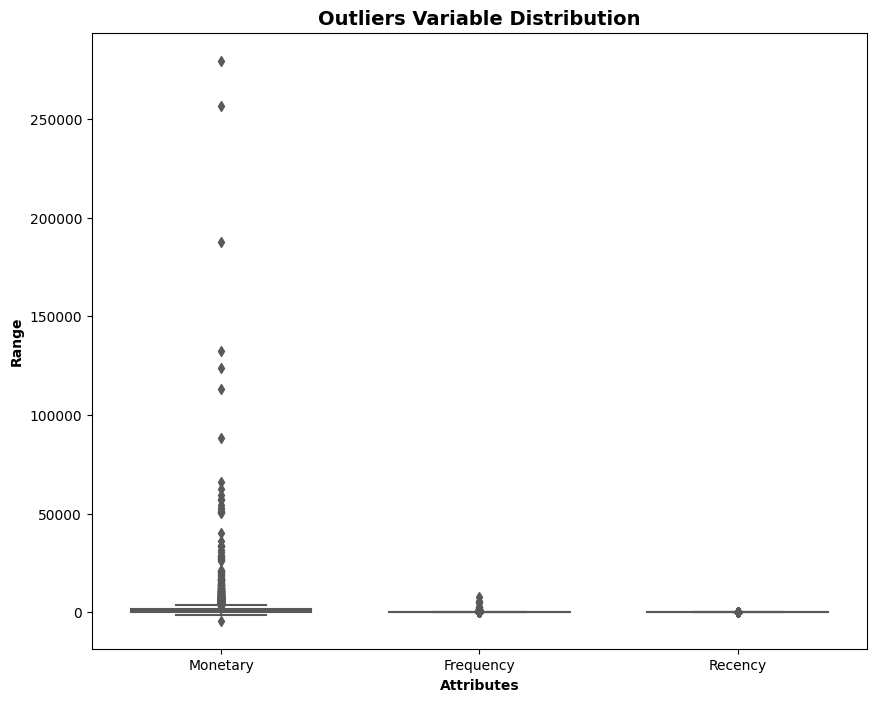

In [ ]:
# Outlier Analysis of RFE
attributes = ['Monetary','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
# Removing (statistical) outliers for Earnings
Q1 = rfm.Monetary.quantile(0.05)
Q3 = rfm.Monetary.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Monetary >= Q1 - 1.5*IQR) & (rfm.Monetary <= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]
# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Proses Normalisasi

In [ ]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4293 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4293 non-null   object 
 1   Monetary    4293 non-null   float64
 2   Frequency   4293 non-null   int64  
 3   Recency     4293 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 167.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Memilih hanya kolom 'Earnings', 'Frequency', dan 'Recency'
rfm_df = rfm[['Monetary', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

#fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)

# Membuat DataFrame dari hasil normalisasi
rfm_df_scaled = pd.DataFrame(rfm_df_scaled, columns=['Monetary', 'Frequency', 'Recency'])
rfm_df_scaled.shape
rfm_df_scaled.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Monetary,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


## Model Building

In [ ]:
k_means = KMeans(n_clusters=4, max_iter=50)
k_means.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=4)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

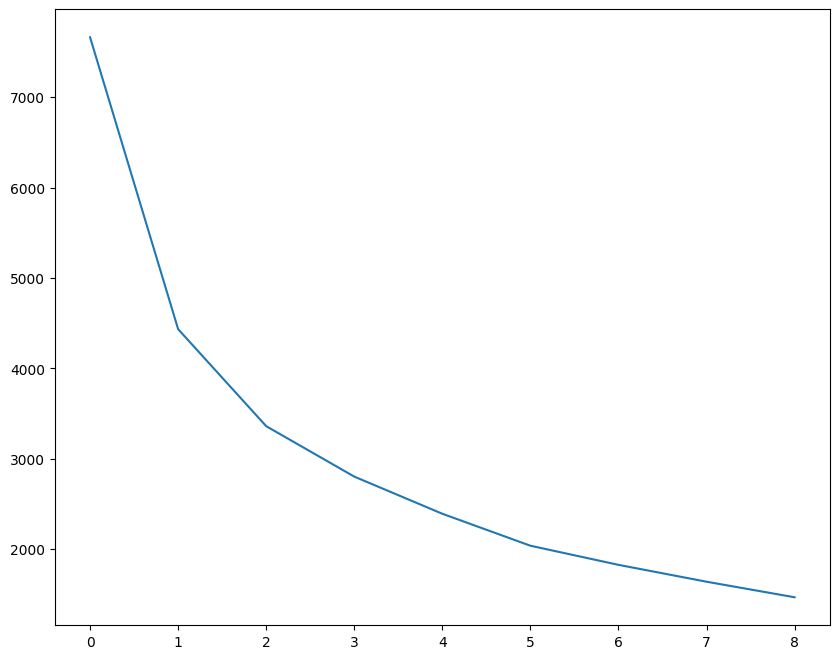

In [ ]:
#Mencari jumlah optimal dari cluster (k) dengan menggunakan metode Elbow Curve
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    k_means = KMeans(n_clusters=num_clusters, max_iter=50)
    k_means.fit(rfm_df_scaled)

    ssd.append(k_means.inertia_)
plt.plot(ssd)

Metode Elbow Curve sering digunakan untuk menentukan jumlah cluster yang optimal, di mana titik "elbow" pada kurva menunjukkan jumlah cluster yang optimal. Namun, nilai k ‘optimal’ yang diperoleh dari metode elbow curve, sering kali bersifat “ambigu”. Untuk mengatasi ambiguitas ini, dilakukan analisis Silhouette. Silhouette Analysis mengukur seberapa dekat (baik) setiap titik pada sebuah cluster dengan titik-titik data lain di clusternya. Semakin tinggi nilai rata-rata dari silhouette, maka semakin bagus clusternya menunjukkan suatu peng-cluster-an yang baik.

Dengan menggunakan kedua metode ini secara bersamaan, kita dapat mendapatkan pandangan yang lebih komprehensif untuk menentukan jumlah klaster yang paling sesuai dengan struktur data yang ada.

In [ ]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:

    # Initialise kmeans
    k_means = KMeans(n_clusters=num_clusters, max_iter=50, n_init=10)
    k_means.fit(rfm_df_scaled)
    cluster_labels = k_means.labels_

    # Silhouette Score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.4812247940142438
For n_clusters=5, the silhouette score is 0.46399070900769845
For n_clusters=6, the silhouette score is 0.41752310128909054
For n_clusters=7, the silhouette score is 0.4162984456758723
For n_clusters=8, the silhouette score is 0.40959458968036444


Dari metode Silhouette Analysis didapatkan nilai k yang optimal adalah 1 yang memiliki score 0.54

In [ ]:
# Final model with k=2
k_means = KMeans(n_clusters=2, max_iter=50)
k_means.fit(rfm_df_scaled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=2)

In [ ]:
# membuat kolom cluster id
rfm['ClusterId'] = k_means.labels_
rfm.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,Monetary,Frequency,Recency,ClusterId
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


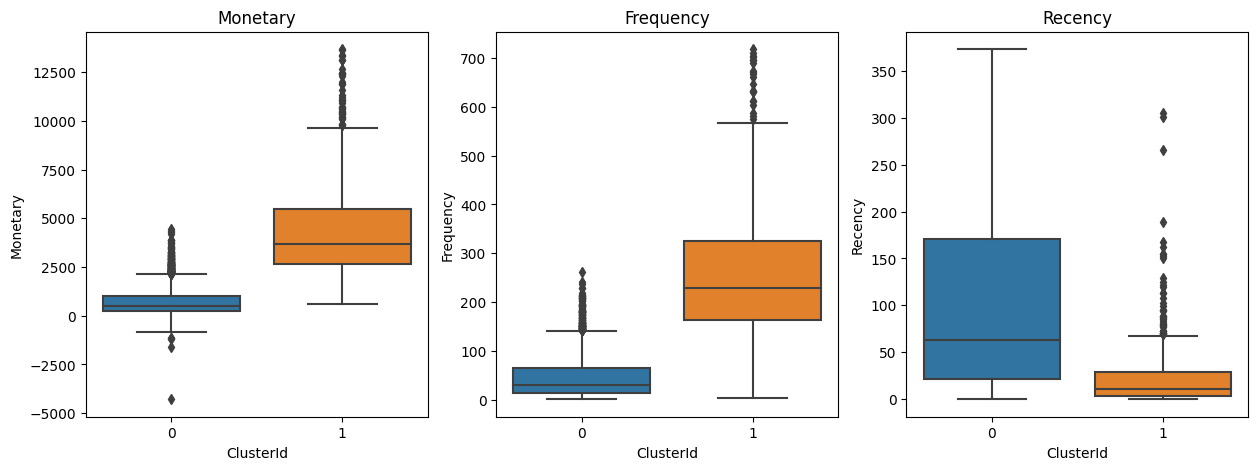

In [ ]:

# Boxplot untuk memvisualisasikan cluster id dengan Pendapatan, Frekuensi, dan Recency
# Membuat subplot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Boxplot untuk Pendapatan
sns.boxplot(x='ClusterId', y='Monetary', data=rfm, ax=axes[0])
axes[0].set_title('Monetary')

# Boxplot untuk Frekuensi
sns.boxplot(x='ClusterId', y='Frequency', data=rfm, ax=axes[1])
axes[1].set_title('Frequency')

# Boxplot untuk Recency
sns.boxplot(x='ClusterId', y='Recency', data=rfm, ax=axes[2])
axes[2].set_title('Recency')

# Menampilkan gambar
plt.show()

## Final Analysis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


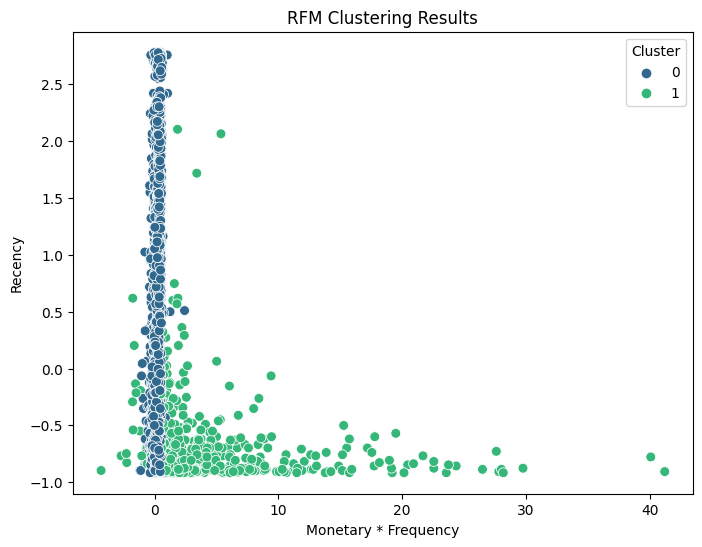

In [ ]:
# Tambahkan label klaster ke DataFrame
rfm_df_scaled['Cluster'] = k_means.labels_

# Plot hasil klasterisasi menggunakan scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm_df_scaled['Monetary'] * rfm_df_scaled['Frequency'], y=rfm_df_scaled['Recency'],
                hue=k_means.labels_, palette='viridis', s=50)
plt.title('RFM Clustering Results')
plt.xlabel('Monetary * Frequency')
plt.ylabel('Recency')
plt.legend(title='Cluster', loc='upper right')
plt.show()

#Classification

In [ ]:
ha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Encoding

In [ ]:
for column in ha.columns:
    if column != 'Patient ID':
        ha[column] = ha[column].astype('category')
        ha[column] = ha[column].cat.codes
ha

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,49,1,88,2510,32,0,0,1,0,...,4871,7481,5375,256,0,2,0,5,1,0
1,CZE1114,3,1,269,2815,58,1,1,1,1,...,3637,8187,3723,205,1,3,3,4,0,0
2,BNI9906,3,0,204,3224,32,1,0,0,0,...,6884,6700,4140,557,4,0,6,3,0,0
3,JLN3497,66,1,263,2689,33,1,1,1,0,...,5644,3282,7416,348,3,0,3,4,0,0
4,GFO8847,48,1,198,3563,53,1,1,1,1,...,1112,4385,1534,201,1,1,16,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,42,1,1,3680,21,1,1,1,0,...,7884,6702,634,37,7,3,16,1,0,0
8759,QSV6764,10,0,0,2434,33,1,0,0,1,...,2781,6181,2423,587,4,5,3,4,0,0
8760,XKA5925,29,1,130,2624,65,0,1,1,1,...,1696,546,6982,497,4,0,2,5,1,1
8761,EPE6801,18,1,58,838,20,1,0,1,0,...,15,5948,3767,84,2,4,2,5,1,0


## Data Balancing

In [ ]:
ha['Heart Attack Risk'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    5624
1    3139
Name: Heart Attack Risk, dtype: int64

In [ ]:
X = ha.iloc[:, 1:-1]  # Memilih data mulai dari kolom kedua hingga sebelum kolom terakhir
y = ha['Heart Attack Risk']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
balancer = RandomOverSampler(random_state=42)
X_balanced, y_balanced = balancer.fit_resample(X, y)
y_balanced.value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    5624
1    5624
Name: Heart Attack Risk, dtype: int64

## Data Splitting

In [ ]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=123, stratify=y_balanced)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Feature Scalling

In [ ]:
ha.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Patient ID                       8763 non-null   object
 1   Age                              8763 non-null   int8  
 2   Sex                              8763 non-null   int8  
 3   Cholesterol                      8763 non-null   int16 
 4   Blood Pressure                   8763 non-null   int16 
 5   Heart Rate                       8763 non-null   int8  
 6   Diabetes                         8763 non-null   int8  
 7   Family History                   8763 non-null   int8  
 8   Smoking                          8763 non-null   int8  
 9   Obesity                          8763 non-null   int8  
 10  Alcohol Consumption              8763 non-null   int8  
 11  Exercise Hours Per Week          8763 non-null   int16 
 12  Diet                             8

In [ ]:
X_balanced.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
count,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,...,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000,11248.000000
mean,35.794186,0.698346,140.735331,1945.286807,35.106419,0.657272,0.492443,0.897404,0.500800,0.594772,...,4.479730,4377.801654,4312.185989,4392.963638,389.124644,3.490043,3.002845,9.408517,2.430121,0.351529
std,21.267690,0.458996,80.604351,1127.218941,20.636118,0.474642,0.499965,0.303444,0.500022,0.490958,...,2.855417,2537.485951,2479.090185,2520.918789,225.125598,2.289311,1.988272,5.798626,1.590826,0.477469
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,73.000000,976.000000,17.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,2.000000,2182.750000,2161.000000,2200.750000,196.000000,1.000000,1.000000,4.000000,1.000000,0.000000
50%,36.000000,1.000000,140.000000,1933.000000,35.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,4.000000,4381.500000,4328.000000,4389.500000,390.000000,3.000000,3.000000,9.000000,3.000000,0.000000
75%,54.000000,1.000000,210.000000,2917.250000,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6589.250000,6463.250000,6583.250000,585.000000,6.000000,5.000000,14.000000,4.000000,1.000000
max,72.000000,1.000000,280.000000,3914.000000,70.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,8762.000000,8614.000000,8762.000000,770.000000,7.000000,6.000000,19.000000,5.000000,1.000000


In [ ]:
scaler = StandardScaler()

X_train['Age'] = scaler.fit_transform(X_train[['Age']])
X_test['Age'] = scaler.transform(X_test[['Age']])

X_train['Cholesterol'] = scaler.fit_transform(X_train[['Cholesterol']])
X_test['Cholesterol'] = scaler.transform(X_test[['Cholesterol']])

X_train['Heart Rate'] = scaler.fit_transform(X_train[['Heart Rate']])
X_test['Heart Rate'] = scaler.transform(X_test[['Heart Rate']])

X_train['Exercise Hours Per Week'] = scaler.fit_transform(X_train[['Exercise Hours Per Week']])
X_test['Exercise Hours Per Week'] = scaler.transform(X_test[['Exercise Hours Per Week']])

X_train['Income'] = scaler.fit_transform(X_train[['Income']])
X_test['Income'] = scaler.transform(X_test[['Income']])

X_train['BMI'] = scaler.fit_transform(X_train[['BMI']])
X_test['BMI'] = scaler.transform(X_test[['BMI']])

X_train['Triglycerides'] = scaler.fit_transform(X_train[['Triglycerides']])
X_test['Triglycerides'] = scaler.transform(X_test[['Triglycerides']])

X_train.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
count,8.998000e+03,8998.000000,8.998000e+03,8998.000000,8.998000e+03,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000,...,8998.000000,8998.000000,8.998000e+03,8.998000e+03,8.998000e+03,8998.000000,8998.000000,8998.000000,8998.000000,8998.000000
mean,-1.125276e-16,0.698822,1.350331e-16,1940.114248,-1.208191e-16,0.656924,0.489664,0.897866,0.503779,0.595799,...,4.496555,4380.063347,-2.369002e-17,-1.484575e-16,-5.646122e-17,3.496888,2.993110,9.460991,2.431429,0.350967
std,1.000056e+00,0.458795,1.000056e+00,1129.881851,1.000056e+00,0.474763,0.499921,0.302841,0.500014,0.490764,...,2.856102,2533.806742,1.000056e+00,1.000056e+00,1.000056e+00,2.286898,1.991244,5.804241,1.592789,0.477299
min,-1.684351e+00,0.000000,-1.745726e+00,0.000000,-1.703156e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.743657e+00,-1.746336e+00,-1.725751e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.866702e-01,0.000000,-8.538302e-01,958.250000,-8.800953e-01,0.000000,0.000000,1.000000,0.000000,0.000000,...,2.000000,2210.250000,-8.668234e-01,-8.667704e-01,-8.701272e-01,2.000000,1.000000,4.000000,1.000000,0.000000
50%,4.854938e-03,1.000000,9.031074e-04,1923.000000,-8.619840e-03,1.000000,0.000000,1.000000,1.000000,1.000000,...,4.000000,4365.500000,6.974438e-03,2.657103e-03,7.662909e-03,3.000000,3.000000,9.000000,3.000000,0.000000
75%,8.963801e-01,1.000000,8.680239e-01,2916.750000,8.628557e-01,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6579.000000,8.628612e-01,8.680093e-01,8.677199e-01,6.000000,5.000000,15.000000,4.000000,1.000000
max,1.694060e+00,1.000000,1.722757e+00,3914.000000,1.685916e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,8762.000000,1.743034e+00,1.736542e+00,1.687877e+00,7.000000,6.000000,19.000000,5.000000,1.000000


## Data Preparation

In [ ]:
from sklearn.preprocessing import OneHotEncoder

kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])

numeric_features = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
                    'Sleep Hours Per Day']
binary_features = ['Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Previous Heart Problems', 'Medication Use']
categorical_features = ['Sex', 'Blood Pressure', 'Diet', 'Stress Level', 'Country', 'Continent', 'Hemisphere']

numeric_transformer = make_pipeline(StandardScaler())
categorical_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'))
binary_transformer = make_pipeline(OneHotEncoder(drop='if_binary'))

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_features),
    (categorical_transformer, categorical_features),
    (binary_transformer, binary_features))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model_selection_scores = dict()
model_selection_scores["Metode"] = []
model_selection_scores["F1-Score Test"] = []
model_selection_scores["ROC-AUC Score Test"] = []

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Membuat Model

### Logistic Regression

In [ ]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Variasi parameter C
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga', 'newton-cholesky' ]  # Variasi solver
}

# Membuat objek model Regresi Logistik
logreg = LogisticRegression(random_state=123)

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Melatih model dengan parameter terbaik
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Parameter terbaik: {'C': 100, 'solver': 'liblinear'}


In [ ]:
# Inisialisasi model logistic Regression dengan parameter yang disebutkan
logreg = LogisticRegression(C=10, solver='newton-cg')

# Pipeline untuk model Regresi Logistik
logreg_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', logreg)
])

# Validasi Silang dengan K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(logreg_pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Validasi Silang (Akurasi):")
print(scores)
print("Rata-rata Akurasi:", scores.mean())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Hasil Validasi Silang (Akurasi):
[0.64196123 0.64196123 0.64196123 0.64269406 0.64155251 0.64155251
 0.64155251 0.64155251 0.64155251 0.64155251]
Rata-rata Akurasi: 0.6417892826832862


In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []
kfold_sum = []
fold_no = []
best_kfold = 0
best_kfold_logreg = 0

for train_index, val_index in skf.split(X_train, y_train):
    train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]
    logreg_pipe.fit(train_features, train_labels)
    pred_labels = logreg_pipe.predict(val_features)
    f1 = f1_score(val_labels, pred_labels)
    roc_auc = roc_auc_score(val_labels, pred_labels)
    kfold_sum = f1+roc_auc
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    kfold_set.at[fold_num, 'train'] = train_index
    kfold_set.at[fold_num, 'val'] = val_index
    print(f"F1-score for fold {fold_num}: ", f1)
    print(f"ROC-AUC score for fold {fold_num}: ", roc_auc)
    print(f"Summary Score for {fold_num}: ", kfold_sum, '\n')
    if kfold_sum > best_kfold:
      best_kfold = kfold_sum
      best_kfold_logreg = fold_num
    fold_num += 1
print(f"Best Kfold is: {best_kfold_logreg}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


F1-score for fold 1:  0.5105908584169453
ROC-AUC score for fold 1:  0.5122222222222222
Summary Score for 1:  1.0228130806391675 

F1-score for fold 2:  0.5372807017543859
ROC-AUC score for fold 2:  0.5311111111111111
Summary Score for 2:  1.068391812865497 

F1-score for fold 3:  0.4705882352941176
ROC-AUC score for fold 3:  0.48
Summary Score for 3:  0.9505882352941175 

F1-score for fold 4:  0.48654708520179374
ROC-AUC score for fold 4:  0.49111111111111105
Summary Score for 4:  0.9776581963129047 

F1-score for fold 5:  0.5409482758620691
ROC-AUC score for fold 5:  0.5266666666666667
Summary Score for 5:  1.0676149425287358 

F1-score for fold 6:  0.5299890948745912
ROC-AUC score for fold 6:  0.5211111111111111
Summary Score for 6:  1.0511002059857022 

F1-score for fold 7:  0.5043668122270742
ROC-AUC score for fold 7:  0.4955555555555555
Summary Score for 7:  0.9999223677826298 

F1-score for fold 8:  0.5340782122905027
ROC-AUC score for fold 8:  0.5366666666666666
Summary Score fo

In [ ]:
kfold_set.loc[best_kfold_logreg]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


train    [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
val      [4, 37, 49, 63, 64, 82, 83, 85, 99, 132, 143, ...
Name: 10, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].loc[best_kfold_logreg]].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
count,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,...,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000
mean,-0.004386,0.700333,-0.000808,1943.075565,0.005608,0.657859,0.487715,0.898383,0.503889,0.596493,...,4.494629,4394.218792,-0.004922,0.002173,-0.000766,3.495370,2.990122,9.490678,2.425485,0.353871
std,1.000354,0.458140,1.000908,1127.766716,0.999387,0.474456,0.499880,0.302163,0.500016,0.490631,...,2.864489,2529.511274,1.000526,1.000411,1.001115,2.290212,1.990444,5.798822,1.588882,0.478199
min,-1.684351,0.000000,-1.745726,0.000000,-1.703156,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.743657,-1.746336,-1.725751,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.886670,0.000000,-0.853830,967.000000,-0.880095,0.000000,0.000000,1.000000,0.000000,0.000000,...,2.000000,2240.500000,-0.869353,-0.870249,-0.870127,2.000000,1.000000,4.000000,1.000000,0.000000
50%,0.004855,1.000000,0.000903,1924.000000,-0.008620,1.000000,0.000000,1.000000,1.000000,1.000000,...,4.000000,4387.000000,0.001308,0.004645,0.003230,3.000000,3.000000,10.000000,3.000000,0.000000
75%,0.849458,1.000000,0.868024,2916.000000,0.862856,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6586.500000,0.858813,0.874172,0.867720,6.000000,5.000000,15.000000,4.000000,1.000000
max,1.694060,1.000000,1.722757,3914.000000,1.685916,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,8762.000000,1.742629,1.735747,1.687877,7.000000,6.000000,19.000000,5.000000,1.000000


In [ ]:
X_fold_best_logreg = X_train.iloc[kfold_set['train'].loc[best_kfold_logreg]]
y_fold_best_logreg = y_train.iloc[kfold_set['train'].loc[best_kfold_logreg]]
logreg = LogisticRegression(C=10, solver='newton-cg')
logreg.fit(X_fold_best_logreg, y_fold_best_logreg)
y_pred = logreg.predict(X_test)
f1_score_logreg = f1_score(y_test, y_pred)
roc_auc_logreg = roc_auc_score(y_test, y_pred)
print(f"F1-score: {f1_score_logreg}")
print(f"ROC-AUC Score: {roc_auc_logreg}\n")
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


F1-score: 0.49556737588652483
ROC-AUC Score: 0.49422222222222223

Classification report:
               precision    recall  f1-score   support

           0       0.49      0.49      0.49      1125
           1       0.49      0.50      0.50      1125

    accuracy                           0.49      2250
   macro avg       0.49      0.49      0.49      2250
weighted avg       0.49      0.49      0.49      2250



### Decission Tree

In [ ]:
# Membuat model Decision Tree
dtree = DecisionTreeClassifier()

# Membuat grid parameter yang akan diuji
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'max_features':['auto', 'sqrt', 'log2', None]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')

# Melakukan pencarian parameter terbaik pada data latih
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed i

Parameter terbaik: {'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 2}


In [ ]:
# Inisialisasi model Decision Tree dengan parameter yang disebutkan
dtree = DecisionTreeClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=10)

# Pipeline untuk model Decision Tree
dtree_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', dtree)
])

# Validasi Silang dengan K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(dtree_pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Validasi Silang (Akurasi):")
print(scores)
print("Rata-rata Akurasi:", scores.mean())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Hasil Validasi Silang (Akurasi):
[0.55644242 0.52451539 0.58266819 0.53995434 0.53652968 0.52511416
 0.56164384 0.54680365 0.5673516  0.56506849]
Rata-rata Akurasi: 0.5506091751144156


In [ ]:
# Membuat DataFrame untuk menyimpan hasil validasi silang
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []
kfold_sum = []
fold_no = []
best_kfold = 0
best_kfold_dtree = 0

# Melakukan validasi silang dengan Decision Tree
for train_index, val_index in skf.split(X_train, y_train):
    train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    # Fitting model Decision Tree
    dtree_pipe.fit(train_features, train_labels)
    pred_labels = dtree_pipe.predict(val_features)
    f1 = f1_score(val_labels, pred_labels)
    roc_auc = roc_auc_score(val_labels, pred_labels)
    kfold_sum = f1+roc_auc
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    kfold_set.at[fold_num, 'train'] = train_index
    kfold_set.at[fold_num, 'val'] = val_index
    print(f"F1-score for fold {fold_num}: ", f1)
    print(f"ROC-AUC score for fold {fold_num}: ", roc_auc)
    print(f"Summary Score for {fold_num}: ", kfold_sum, '\n')
    if kfold_sum > best_kfold:
      best_kfold = kfold_sum
      best_kfold_dtree = fold_num
    fold_num += 1
print(f"Best Kfold is: {best_kfold_dtree}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


F1-score for fold 1:  0.6543878656554712
ROC-AUC score for fold 1:  0.6455555555555555
Summary Score for 1:  1.2999434212110268 

F1-score for fold 2:  0.6518987341772152
ROC-AUC score for fold 2:  0.6333333333333333
Summary Score for 2:  1.2852320675105484 

F1-score for fold 3:  0.5968819599109131
ROC-AUC score for fold 3:  0.5977777777777777
Summary Score for 3:  1.1946597376886907 

F1-score for fold 4:  0.6457399103139013
ROC-AUC score for fold 4:  0.648888888888889
Summary Score for 4:  1.2946287992027903 

F1-score for fold 5:  0.6645367412140576
ROC-AUC score for fold 5:  0.65
Summary Score for 5:  1.3145367412140576 

F1-score for fold 6:  0.638157894736842
ROC-AUC score for fold 6:  0.6333333333333333
Summary Score for 6:  1.2714912280701753 

F1-score for fold 7:  0.6098360655737705
ROC-AUC score for fold 7:  0.6033333333333333
Summary Score for 7:  1.2131693989071037 

F1-score for fold 8:  0.6399108138238573
ROC-AUC score for fold 8:  0.641111111111111
Summary Score for 8:

In [ ]:
kfold_set

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,train,val
1,"[0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...","[2, 8, 15, 27, 30, 41, 43, 50, 53, 69, 70, 96,..."
2,"[0, 2, 3, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16,...","[1, 5, 6, 7, 23, 25, 45, 59, 61, 62, 66, 73, 7..."
3,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[20, 28, 33, 36, 47, 51, 60, 71, 76, 87, 88, 9..."
4,"[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 17...","[3, 11, 12, 16, 21, 38, 40, 52, 58, 68, 74, 79..."
5,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[18, 29, 32, 65, 103, 109, 115, 121, 146, 150,..."
6,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...","[10, 39, 55, 110, 111, 113, 118, 120, 125, 127..."
7,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[17, 22, 34, 44, 54, 67, 78, 80, 86, 90, 91, 9..."
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16...","[0, 13, 14, 19, 24, 26, 42, 46, 81, 84, 89, 10..."
9,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14...","[9, 31, 35, 48, 56, 57, 72, 95, 97, 101, 105, ..."
10,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[4, 37, 49, 63, 64, 82, 83, 85, 99, 132, 143, ..."


In [ ]:
kfold_set.loc[best_kfold_dtree]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


train    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
val      [18, 29, 32, 65, 103, 109, 115, 121, 146, 150,...
Name: 5, dtype: object

In [ ]:
X_train.iloc[kfold_set['train'].loc[best_kfold_dtree]].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
count,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,...,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000,8098.000000
mean,-0.001832,0.696468,-0.000801,1940.137194,0.001705,0.657199,0.488516,0.896271,0.503952,0.595703,...,4.482835,4375.198568,0.002680,-0.001837,-0.000571,3.496419,2.995307,9.484070,2.431218,0.348605
std,1.002923,0.459811,1.000573,1129.833488,1.001166,0.474675,0.499899,0.304928,0.500015,0.490786,...,2.855546,2524.695136,1.000553,1.001896,0.997575,2.285220,1.994367,5.796138,1.593343,0.476558
min,-1.684351,0.000000,-1.745726,0.000000,-1.703156,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.743657,-1.746336,-1.725751,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.886670,0.000000,-0.853830,964.250000,-0.880095,0.000000,0.000000,1.000000,0.000000,0.000000,...,2.000000,2217.500000,-0.863990,-0.870349,-0.861261,2.000000,1.000000,4.000000,1.000000,0.000000
50%,0.004855,1.000000,0.000903,1921.000000,-0.008620,1.000000,0.000000,1.000000,1.000000,1.000000,...,4.000000,4359.500000,0.013653,-0.005493,-0.003420,3.000000,3.000000,9.000000,3.000000,0.000000
75%,0.896380,1.000000,0.868024,2920.750000,0.862856,1.000000,1.000000,1.000000,1.000000,1.000000,...,7.000000,6560.750000,0.863367,0.870494,0.863287,6.000000,5.000000,15.000000,4.000000,1.000000
max,1.694060,1.000000,1.722757,3914.000000,1.685916,1.000000,1.000000,1.000000,1.000000,1.000000,...,9.000000,8762.000000,1.743034,1.736542,1.687877,7.000000,6.000000,19.000000,5.000000,1.000000


In [ ]:
X_fold_best_dtree = X_train.iloc[kfold_set['train'].loc[best_kfold_dtree]]
y_fold_best_dtree = y_train.iloc[kfold_set['train'].loc[best_kfold_dtree]]
dtree = DecisionTreeClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=10, splitter="best")
dtree.fit(X_fold_best_dtree, y_fold_best_dtree)
y_pred = dtree.predict(X_test)
f1_score_dtree = f1_score(y_test, y_pred)
roc_auc_dtree = roc_auc_score(y_test, y_pred)
print(f"F1-score: {f1_score_dtree}")
print(f"ROC-AUC Score: {roc_auc_dtree}\n")
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


F1-score: 0.6460101867572156
ROC-AUC Score: 0.6293333333333333

Classification report:
               precision    recall  f1-score   support

           0       0.64      0.58      0.61      1125
           1       0.62      0.68      0.65      1125

    accuracy                           0.63      2250
   macro avg       0.63      0.63      0.63      2250
weighted avg       0.63      0.63      0.63      2250



### K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)
print("Parameter terbaik:", grid_search.best_params_)
print("Skor validasi terbaik:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Parameter terbaik: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Skor validasi terbaik: 0.5907806447915771


In [ ]:
from sklearn.model_selection import cross_val_score
# Inisialisasi model logistic Regression dengan parameter yang disebutkan
knn = KNeighborsClassifier(n_neighbors=9, weights="uniform", p=1)

# Pipeline untuk model Regresi Logistik
knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', knn)
])

# Validasi Silang dengan K-Fold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=130)

# Melakukan validasi silang
scores = cross_val_score(knn_pipe, X, y, cv=skf)

# Menampilkan hasil validasi silang
print("Hasil Validasi Silang (Akurasi):")
print(scores)
print("Rata-rata Akurasi:", scores.mean())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Hasil Validasi Silang (Akurasi):
[0.60433295 0.57696693 0.59521095 0.58675799 0.60388128 0.59703196
 0.57648402 0.57420091 0.59589041 0.61986301]
Rata-rata Akurasi: 0.593062042142422


In [ ]:
kfold_set = pd.DataFrame(index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], columns=['train', 'val'])
fold_num = 1
f1_scores = []
roc_auc_scores = []
kfold_sum = []
fold_no = []
best_kfold = 0
best_kfold_knn = 0

for train_index, val_index in skf.split(X_train, y_train):
    train_features, val_features = X_train.iloc[train_index], X_train.iloc[val_index]
    train_labels, val_labels = y_train.iloc[train_index], y_train.iloc[val_index]

    # Pipeline untuk model Random Forest
    knn_pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('clf', knn)
    ])

    knn_pipe.fit(train_features, train_labels)
    pred_labels = knn_pipe.predict(val_features)
    f1 = f1_score(val_labels, pred_labels)
    roc_auc = roc_auc_score(val_labels, pred_labels)
    kfold_sum = f1+roc_auc
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    kfold_set.at[fold_num, 'train'] = train_index
    kfold_set.at[fold_num, 'val'] = val_index
    print(f"F1-score for fold {fold_num}: ", f1)
    print(f"ROC-AUC score for fold {fold_num}: ", roc_auc)
    print(f"Summary Score for {fold_num}: ", kfold_sum, '\n')
    if kfold_sum > best_kfold:
      best_kfold = kfold_sum
      best_kfold_knn = fold_num
    fold_num += 1
print(f"Best Kfold is: {best_kfold_knn}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


F1-score for fold 1:  0.5521064301552108
ROC-AUC score for fold 1:  0.5511111111111111
Summary Score for 1:  1.1032175412663219 

F1-score for fold 2:  0.5674217907227617
ROC-AUC score for fold 2:  0.5544444444444444
Summary Score for 2:  1.121866235167206 

F1-score for fold 3:  0.5486338797814209
ROC-AUC score for fold 3:  0.5411111111111112
Summary Score for 3:  1.089744990892532 

F1-score for fold 4:  0.5611353711790392
ROC-AUC score for fold 4:  0.5533333333333333
Summary Score for 4:  1.1144687045123725 

F1-score for fold 5:  0.5418933623503808
ROC-AUC score for fold 5:  0.5322222222222222
Summary Score for 5:  1.074115584572603 

F1-score for fold 6:  0.577922077922078
ROC-AUC score for fold 6:  0.5666666666666667
Summary Score for 6:  1.1445887445887446 

F1-score for fold 7:  0.574235807860262
ROC-AUC score for fold 7:  0.5666666666666667
Summary Score for 7:  1.1409024745269285 

F1-score for fold 8:  0.5454545454545454
ROC-AUC score for fold 8:  0.5277777777777778
Summary 

In [ ]:
kfold_set.loc[best_kfold_knn]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


train    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14,...
val      [10, 39, 55, 110, 111, 113, 118, 120, 125, 127...
Name: 6, dtype: object

In [ ]:
X_fold_best_knn = X_train.iloc[kfold_set['train'].loc[best_kfold_knn]]
y_fold_best_knn = y_train.iloc[kfold_set['train'].loc[best_kfold_knn]]
knn = KNeighborsClassifier(n_neighbors=9, p=1, weights="uniform")
knn.fit(X_fold_best_knn, y_fold_best_knn)
y_pred = knn.predict(X_test)
f1_score_knn = f1_score(y_test, y_pred)
roc_auc_knn = roc_auc_score(y_test, y_pred)
print(f"F1-score: {f1_score_knn}")
print(f"ROC-AUC Score: {roc_auc_knn}\n")
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


F1-score: 0.5876288659793814
ROC-AUC Score: 0.5733333333333333

Classification report:
               precision    recall  f1-score   support

           0       0.58      0.54      0.56      1125
           1       0.57      0.61      0.59      1125

    accuracy                           0.57      2250
   macro avg       0.57      0.57      0.57      2250
weighted avg       0.57      0.57      0.57      2250



# Model Selection

In [ ]:
metode = ["Decision Tree", "K-Nearest Neighbor", "Logistic Regression"]
f1_score_test = [f1_score_dtree, f1_score_knn, f1_score_logreg]
roc_auc_score_test = [roc_auc_dtree, roc_auc_knn, roc_auc_logreg]

# Membuat DataFrame
data = {
    "Metode": metode,
    "F1-Score Test": f1_score_test,
    "ROC-AUC Score Test": roc_auc_score_test
}

Model_selection = pd.DataFrame(data)
Model_selection

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Metode,F1-Score Test,ROC-AUC Score Test
0,Decision Tree,0.646010,0.629333
1,K-Nearest Neighbor,0.587629,0.573333
2,Logistic Regression,0.495567,0.494222
